# Data Exploration

## Importing the Dataset

In [1]:
# Define the path to the dataset directory
DATASET_PATH = '../.data/'
IMAGE_SIZE = (224, 224)
VALIDATION_SPLIT = 0.2
BATCH_SIZE = 32

Found 26179 files belonging to 10 classes.
Class names: ['butterfly', 'cat', 'chicken', 'cow', 'dog', 'elephant', 'horse', 'sheep', 'spider', 'squirrel']


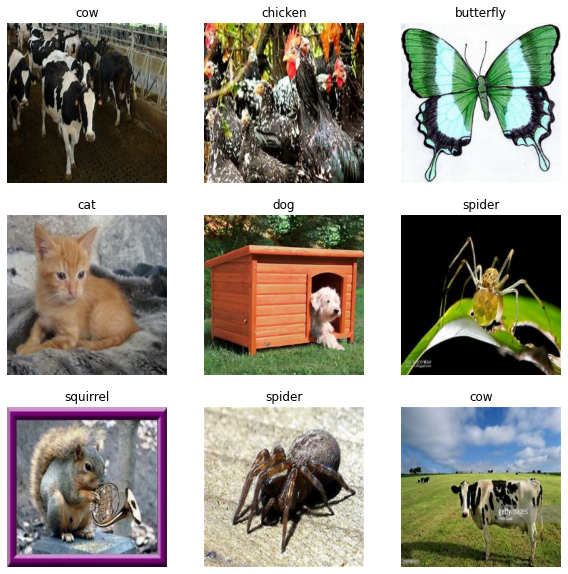

In [2]:
import tensorflow as tf

# Load the entire dataset without splitting
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    DATASET_PATH,
    image_size=IMAGE_SIZE,  # Resize images to a common size
    batch_size=BATCH_SIZE   # Number of images to return in each batch
)

# Print the class names
class_names = dataset.class_names
print("Class names:", class_names)

# Visualize some images from the dataset
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()


Inside the dataset there are 10 classes of animals: butterflys, cats, chickens, cows, dogs, elephants, horses, sheeps, spiders, squirrels

## Checking for balance

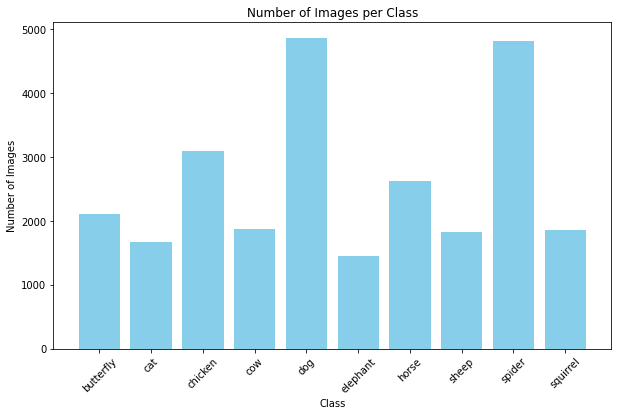

In [4]:
# Initialize a dictionary to count the number of images in each class
class_counts = {class_name: 0 for class_name in class_names}

# Iterate through the dataset and count the number of images in each class
for images, labels in dataset:
    for label in labels:
        class_counts[class_names[label]] += 1

# Plot the number of images in each class
plt.figure(figsize=(10, 6))
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Number of Images per Class')
plt.xticks(rotation=45)
plt.show()

We clearly have an unbalanced dataset, where the dog and spider classes have way more instances then the rest.